In [8]:
%load_ext autoreload
%autoreload 2
from board import *
from candy import *
from analysis import *
import matplotlib.pyplot as plt
import pandas as pd
from viz import Viz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
#df = pd.read_csv('results_backup/results_arena.csv')
#df = pd.read_csv('generated/results_100000.csv')
#df = pd.read_csv('explo_param_analysis_100.csv')

#df = pd.read_csv('n_random_analysis_100.csv')
#df.drop(columns=['Unnamed: 0'], inplace=True)
df = pd.read_csv('results_arena_with_human_ready.csv')
#df = pd.read_csv('results_arena_500.csv')
time = pd.read_csv('time_arena_500.csv')


/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_45923/1302192680.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rank_counts.plot(kind='bar', stacked=True, ax=ax1, colormap=cm.get_cmap('Blues_r'))


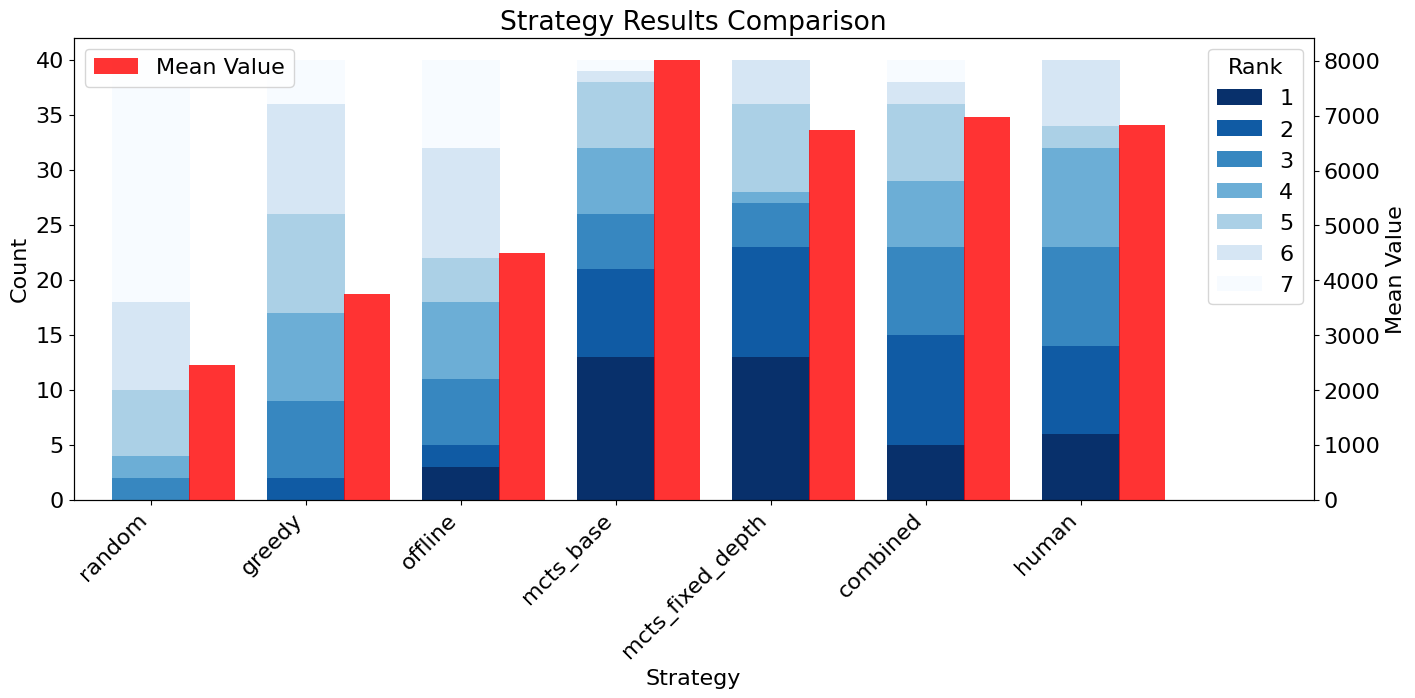

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

# Assuming df is already defined
# Rank each row
ranks = df.rank(axis=1, method='min', ascending=False)

# Count the number of times each strategy was 1st, 2nd, 3rd, etc.
rank_counts = pd.DataFrame(0, index=df.columns, columns=range(1, len(df.columns) + 1))
for col in ranks.columns:
    rank_counts.loc[col] = ranks[col].value_counts().reindex(range(1, len(df.columns) + 1), fill_value=0)

# Set font size
plt.rcParams.update({'font.size': 16})

# Plot stacked bar plot with strategies on the x-axis using a colormap
fig, ax1 = plt.subplots(figsize=(16, 6))

rank_counts.plot(kind='bar', stacked=True, ax=ax1, colormap=cm.get_cmap('Blues_r'))
ax1.set_xlabel('Strategy')
ax1.set_ylabel('Count')
ax1.set_title('Strategy Results Comparison')
ax1.legend(title='Rank')

# Create a second y-axis
ax2 = ax1.twinx()
df.mean().plot(kind='bar', color='red', ax=ax2, alpha=0.8, position=-0.81, width=0.3)
ax2.set_ylabel('Mean Value')
ax2.legend(['Mean Value'], loc='upper left')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
plt.xlim(-0.5, 7.5)
plt.show()

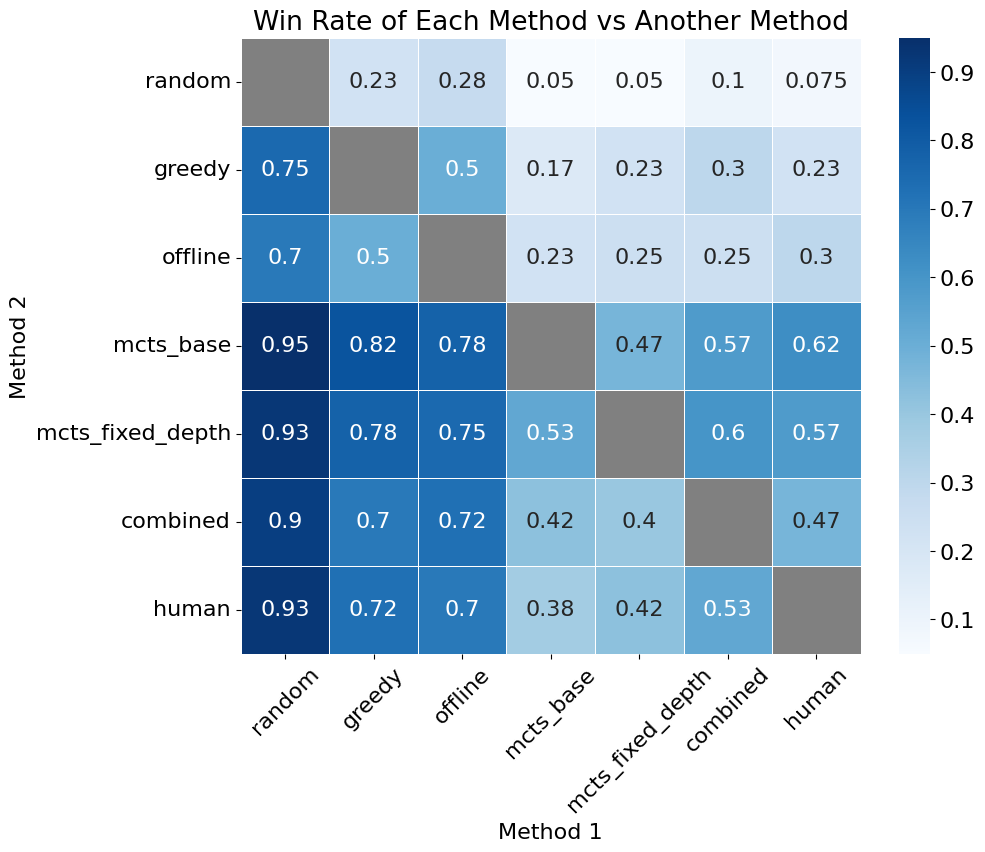

In [11]:
import seaborn as sns
methods = df.columns
win_rates = pd.DataFrame(index=methods, columns=methods, dtype=float)

for method1 in methods:
    for method2 in methods:
        if method1 != method2:
            win_rate = (df[method1] > df[method2]).mean()
            win_rates.loc[method1, method2] = win_rate
        else:
            win_rates.loc[method1, method2] = None

# Plot heatmap
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("Blues", as_cmap=True)
cmap.set_bad('grey')
cmap.set_extremes()
sns.heatmap(win_rates, annot=True, cmap=cmap, cbar=True, linewidths=.5)
plt.title('Win Rate of Each Method vs Another Method')
plt.xlabel('Method 1')
plt.ylabel('Method 2')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

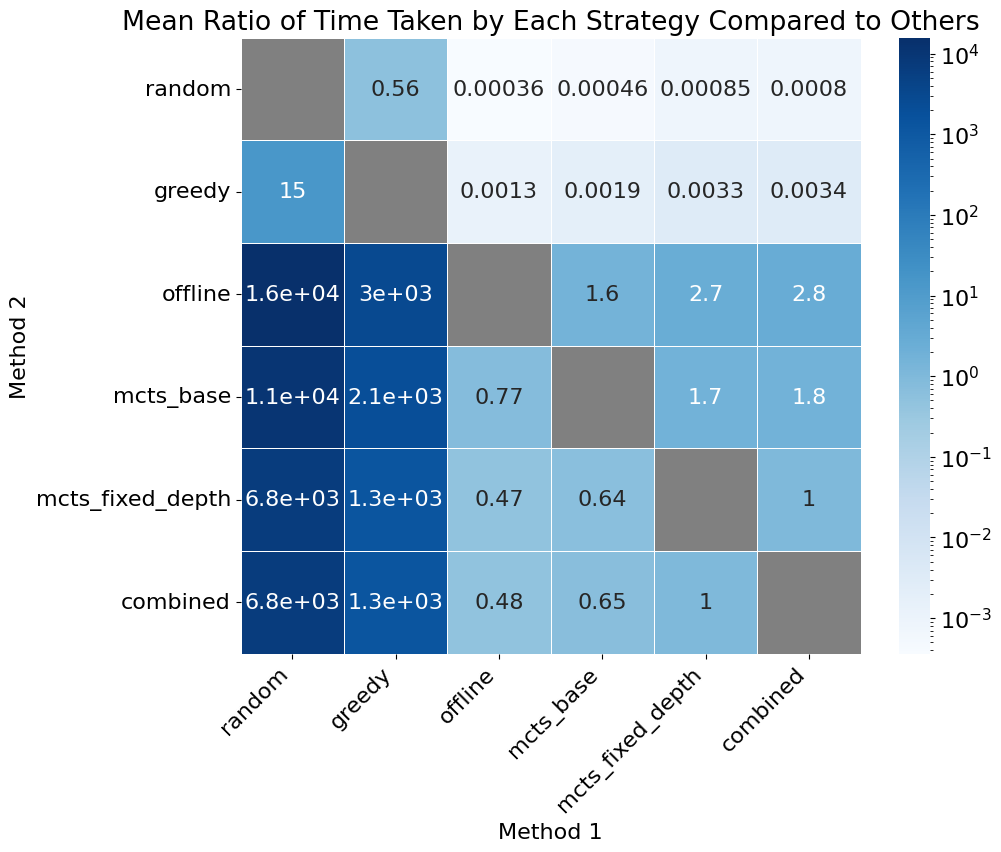

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Calculate mean ratios
methods = time.columns
mean_ratios = pd.DataFrame(index=methods, columns=methods, dtype=float)

for method1 in methods:
    for method2 in methods:
        if method1 != method2:
            mean_ratio = (time[method1] / time[method2]).mean()
            mean_ratios.loc[method1, method2] = mean_ratio
        else:
            mean_ratios.loc[method1, method2] = None

# Plot heatmap with logarithmic color scale
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("Blues", as_cmap=True)
cmap.set_bad('grey')
sns.heatmap(mean_ratios, annot=True, cmap=cmap, cbar=True, linewidths=.5, norm=LogNorm())
plt.title('Mean Ratio of Time Taken by Each Strategy Compared to Others')
plt.xlabel('Method 1')
plt.ylabel('Method 2')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [41]:
wins = []
for idx in df.index:
    winner = None
    best_score = 0
    for col in df.columns:
        score = df.iloc[idx][col]
        if score > best_score:
            best_score = score
            winner = col
    wins.append(winner)    

In [42]:
for col in df.columns:  
    print(col, wins.count(col))

random 4
mcts_base 76
mcts_fixed_depth 56
offline 1
combined 63


In [43]:
for col in df.columns:  
    print(col, wins.count(col))

random 4
mcts_base 76
mcts_fixed_depth 56
offline 1
combined 63


/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/a

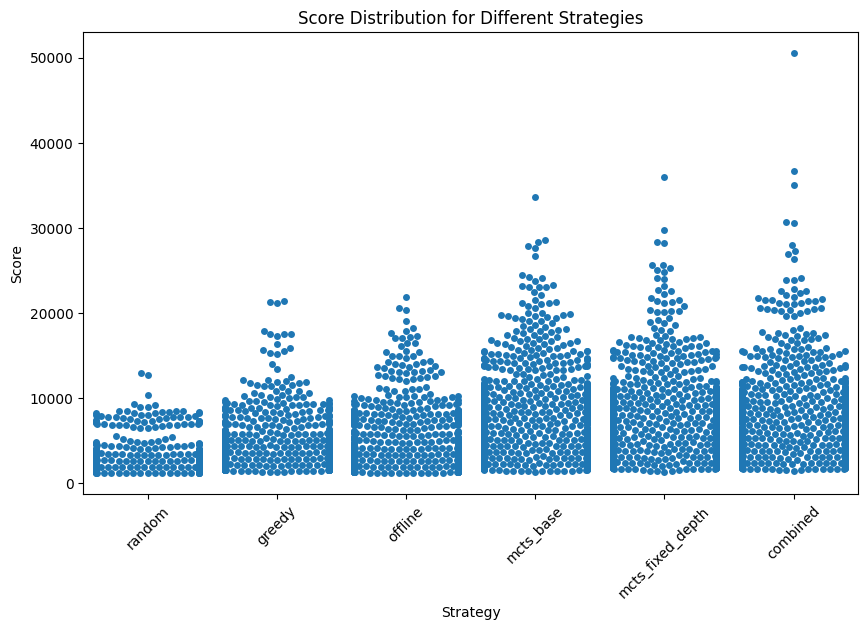

In [13]:
import seaborn as sns
# Melt the DataFrame to long format
df_melted = df.melt(var_name='Strategy', value_name='Score')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Strategy', y='Score', data=df_melted)
plt.title('Score Distribution for Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

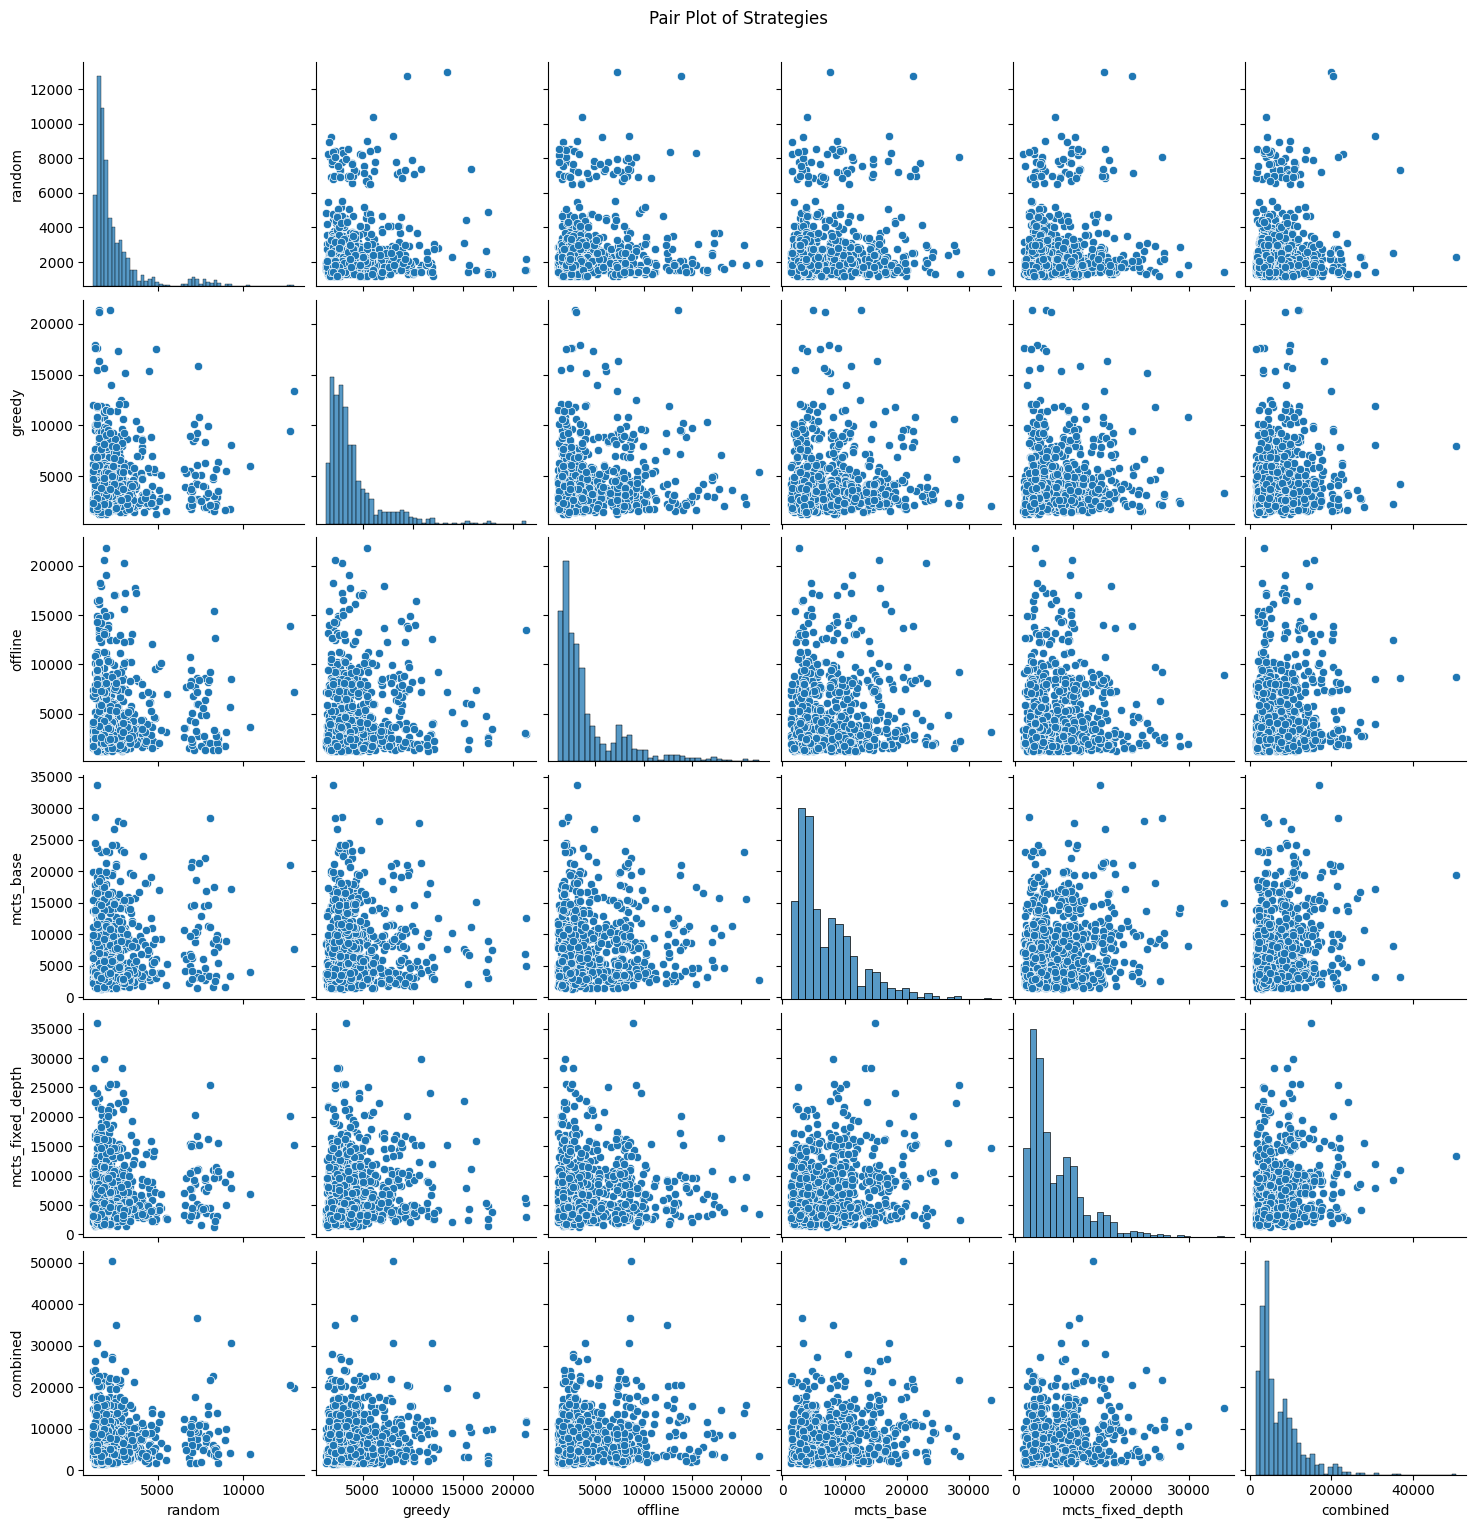

In [14]:
# Create a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of Strategies', y=1.02)
plt.show()

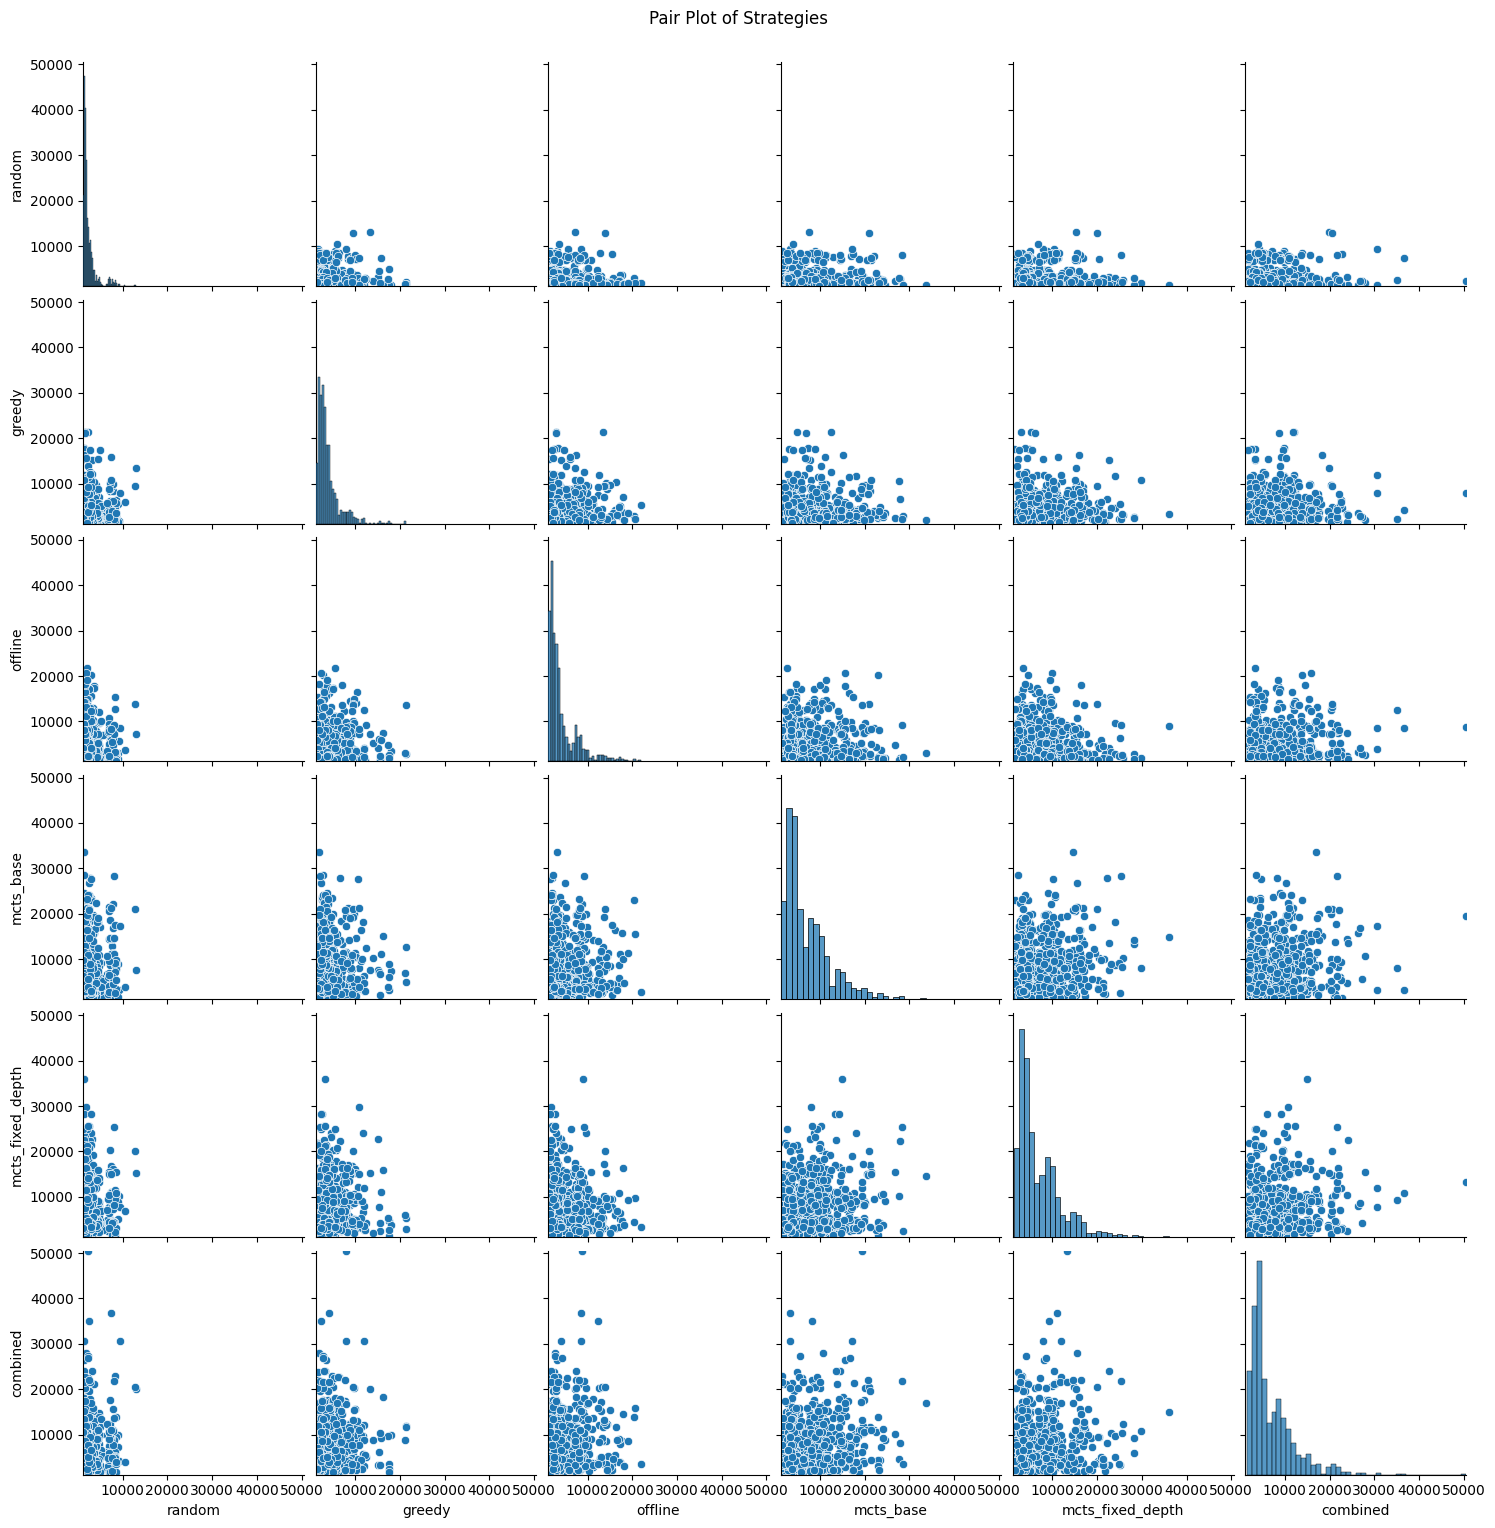

In [15]:

pairplot = sns.pairplot(df)

# Set the same xlim and ylim for all subplots
xlim = (df.min().min(), df.max().max())
ylim = (df.min().min(), df.max().max())

for ax in pairplot.axes.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.suptitle('Pair Plot of Strategies', y=1.02)
plt.show()